### Predicting whether a sequence of heads or tails of length 20 was computer generated or human written
#### Logistic Regression:
##### Do a little bit of data stuff and give it ton of variables

In [1]:
import util
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support



In [2]:
data, human, computer = util.load_logistic_regression_dataframe()
data.head()

,combo,class,streak_1,streak_2,streak_3,streak_4,streak_5,streak_6,streak_7,streak_8,...,streak_11,streak_12,streak_13,streak_14,streak_15,streak_16,streak_17,streak_18,streak_19,streak_20
0,ttthhhttthhttthhhhhh,computer,0,1,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hhtttthttttttthhtttt,computer,1,2,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,thhthththhththhththt,human,14,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,thththththththththth,human,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ttthtttthttthhtththt,computer,6,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
human.describe()

,streak_1,streak_2,streak_3,streak_4,streak_5,streak_6,streak_7,streak_8,streak_9,streak_10,streak_11,streak_12,streak_13,streak_14,streak_15,streak_16,streak_17,streak_18,streak_19,streak_20
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,10.621662,1.339763,0.667656,0.280415,0.135015,0.060831,0.037092,0.035608,0.010386,0.022255,0.008902,0.007418,0.001484,0.007418,0.005935,0.004451,0.001484,0.002967,0.002967,0.053412
std,6.246607,1.450109,0.898699,0.587135,0.379085,0.251314,0.204237,0.193296,0.101455,0.175236,0.094000,0.085874,0.038519,0.085874,0.076865,0.066617,0.038519,0.054433,0.054433,0.225022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,7.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
computer.describe()

,streak_1,streak_2,streak_3,streak_4,streak_5,streak_6,streak_7,streak_8,streak_9,streak_10,streak_11,streak_12,streak_13,streak_14,streak_15,streak_16,streak_17,streak_18,streak_19,streak_20
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0
mean,5.508902,2.574184,1.246291,0.590504,0.272997,0.145401,0.077151,0.031157,0.010386,0.008902,0.002967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.652327,1.502247,1.050802,0.726263,0.493296,0.373233,0.267030,0.173872,0.101455,0.094000,0.054433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,3.750000,2.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,15.000000,8.000000,5.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, y_train, X_test, y_test = util.load_logistic_regression_data()
X_train

array([[ 3,  3,  1, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [20,  0,  0, ...,  0,  0,  0],
       ...,
       [ 2,  4,  2, ...,  0,  0,  0],
       [ 7,  5,  1, ...,  0,  0,  0],
       [ 8,  3,  2, ...,  0,  0,  0]])

In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(20,)))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="mse", optimizer="rmsprop", metrics=['mse', 'accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-15 23:14:06.750817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-15 23:14:06.750924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [8]:
logistic = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100


2023-01-15 23:14:06.897095: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13/38 [=========>....................] - ETA: 0s - loss: 0.2002 - mse: 0.2002 - accuracy: 0.6611 

2023-01-15 23:14:07.155099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 1s 9ms/step - loss: 0.1840 - mse: 0.1840 - accuracy: 0.7024 - val_loss: 0.1841 - val_mse: 0.1841 - val_accuracy: 0.7037
Epoch 2/100
24/38 [=================>............] - ETA: 0s - loss: 0.1731 - mse: 0.1731 - accuracy: 0.7396

2023-01-15 23:14:07.540086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 0s 5ms/step - loss: 0.1727 - mse: 0.1727 - accuracy: 0.7436 - val_loss: 0.1776 - val_mse: 0.1776 - val_accuracy: 0.6963
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1682 - mse: 0.1682 - accuracy: 0.7535 - val_loss: 0.1750 - val_mse: 0.1750 - val_accuracy: 0.7037
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1661 - mse: 0.1661 - accuracy: 0.7593 - val_loss: 0.1736 - val_mse: 0.1736 - val_accuracy: 0.7185
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1647 - mse: 0.1647 - accuracy: 0.7642 - val_loss: 0.1727 - val_mse: 0.1727 - val_accuracy: 0.7185
Epoch 6/100
38/38 [==============================] - 0s 8ms/step - loss: 0.1634 - mse: 0.1634 - accuracy: 0.7634 - val_loss: 0.1719 - val_mse: 0.1719 - val_accuracy: 0.7259
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1623 - mse: 0.1623 - accuracy: 0.7667 - val_loss: 0.1710 - val_mse: 0.17

In [9]:
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(round(y_pred[i][0]))
pred = np.array(pred)

pred

5/5 [==============================] - 0s 2ms/step


2023-01-15 23:14:29.454720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1])

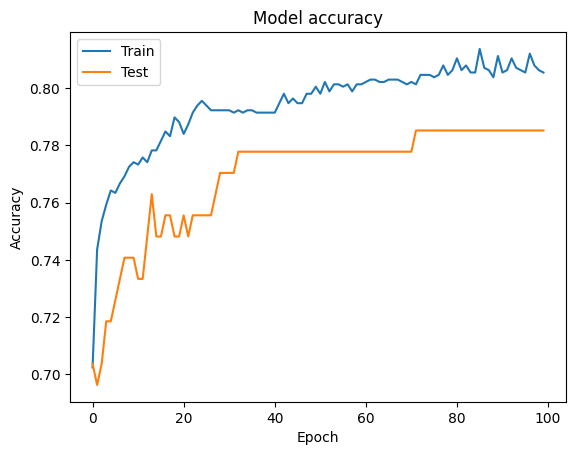

In [10]:
plt.plot(logistic.history['accuracy'])
plt.plot(logistic.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


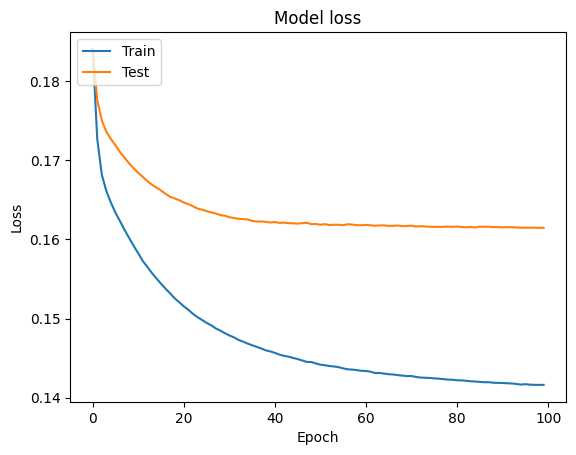

In [11]:
plt.plot(logistic.history['loss']) 
plt.plot(logistic.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Accuracy is: 78.51851851851852
Precision: 0.85
Recall: 0.68
F-Score: 0.75


Text(50.722222222222214, 0.5, 'True')

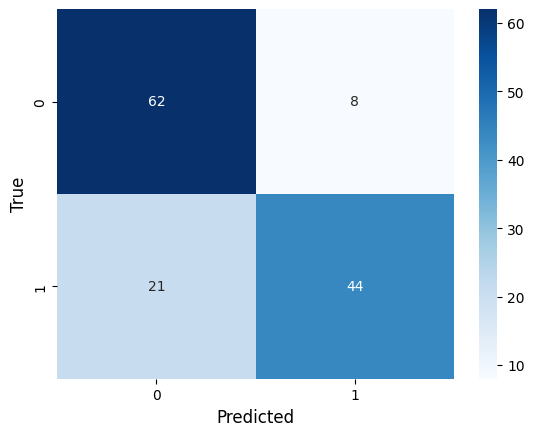

In [12]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred, average='binary')
a = accuracy_score(pred,y_test)
print('Accuracy is:', a*100)
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("F-Score:", np.round(fscore, 2))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

0: Computer <br>
1: Human <br>
It is shown that the neural network predicted that a sequence was computer generated when it was a human that wrote it <br>
That makes sense as the sequence length is only 20 resulting in the chance that a human mimicks randomness well enough to be classified as a computer is high

In [13]:
util.predict_logistic(util.random_coinflip(),model)
util.predict_logistic("hthththththththththt",model)

1/1 [==============================] - 0s 30ms/step
Model prediction of tttttthhhtthththttth: 0.603048% Computer
1/1 [==============================] - 0s 22ms/step
Model prediction of hthththththththththt: 0.989104% Human


In [14]:
model.save("./models/logistic")

INFO:tensorflow:Assets written to: ./models/logistic/assets
